<a href="https://colab.research.google.com/github/mark-polo/machine-learning/blob/main/Sea_animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone "https://github.com/mark-polo/Kaggle-competitions.git"

Cloning into 'Kaggle-competitions'...
remote: Enumerating objects: 18455, done.
remote: Total 18455 (delta 0), reused 0 (delta 0), pack-reused 18455
Receiving objects: 100% (18455/18455), 926.87 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Checking out files: 100% (18829/18829), done.


In [ ]:
path_to_dir = "/content/Kaggle-competitions/sea_animals"

In [ ]:
SIZE = (224,224)
SHAPE = (224, 224, 3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from pathlib import Path
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import random
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [ ]:
for dirpath, dirname, filenames in os.walk(path_to_dir):
  print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 19 directories and 0 images in /content/Kaggle-competitions/sea_animals
There are 0 directories and 782 images in /content/Kaggle-competitions/sea_animals/Dolphin
There are 0 directories and 497 images in /content/Kaggle-competitions/sea_animals/Eel
There are 0 directories and 499 images in /content/Kaggle-competitions/sea_animals/Starfish
There are 0 directories and 499 images in /content/Kaggle-competitions/sea_animals/Lobster
There are 0 directories and 500 images in /content/Kaggle-competitions/sea_animals/Nudibranchs
There are 0 directories and 572 images in /content/Kaggle-competitions/sea_animals/Whale
There are 0 directories and 590 images in /content/Kaggle-competitions/sea_animals/Sharks
There are 0 directories and 855 images in /content/Kaggle-competitions/sea_animals/Jelly Fish
There are 0 directories and 482 images in /content/Kaggle-competitions/sea_animals/Penguin
There are 0 directories and 562 images in /content/Kaggle-competitions/sea_animals/Octopus
There a

# **Creating dataset**

In [ ]:
path = Path(path_to_dir)

files = list(path.glob(r'**/*.JPG')) + list(path.glob(r'**/*.jpg')) + list(path.glob(r'**/*.PNG')) + list(path.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], files))

filepath = pd.Series(files, name="Path").astype(str)
label = pd.Series(labels, name="Label")

df = pd.concat([filepath, label], axis=1)

In [ ]:
df["Path"][0]

'/content/Kaggle-competitions/sea_animals/Dolphin/5988427409_6a1cee4eae_o.jpg'

# **Visualization images**

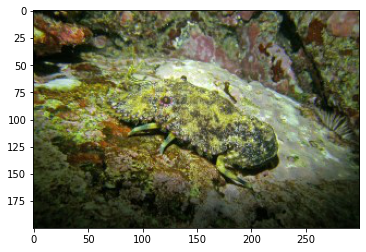

In [ ]:
image = Image.open(df["Path"][2101])
plt.imshow(image)
plt.show()

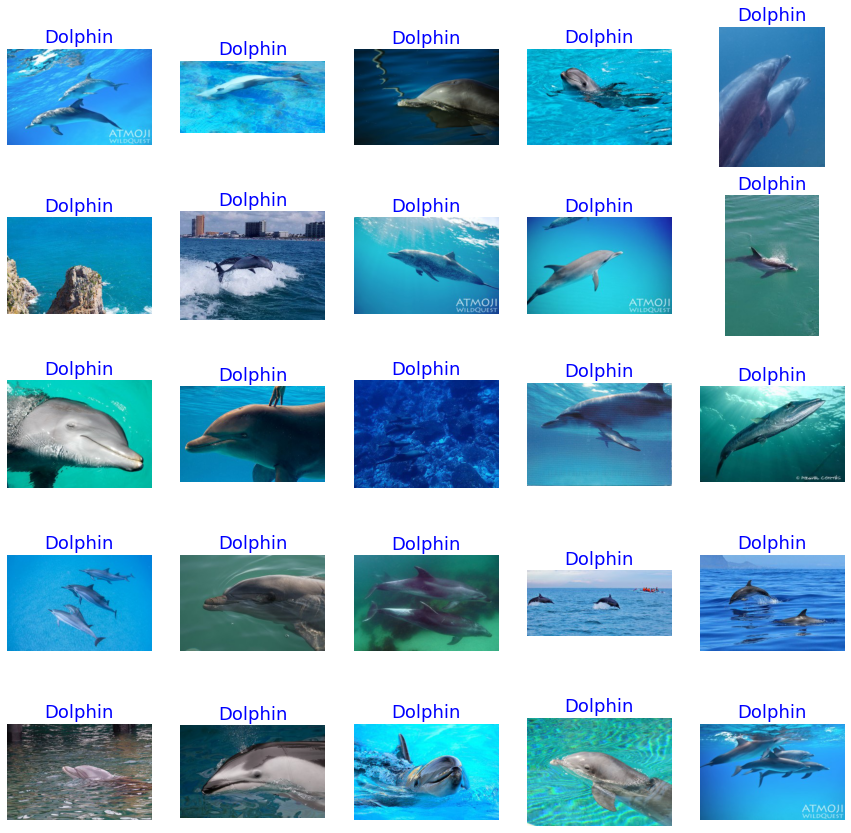

In [ ]:
def visualization(folder):
    classes = folder["Label"].unique()   

    plt.figure(figsize=(15, 15))

    for i in range(25):        
        plt.subplot(5, 5, i + 1)
        image = Image.open(folder["Path"][i])
        plt.imshow(image)
        index = np.argmax(folder["Label"][i])
        class_name = classes[index]
        plt.title(class_name, color='blue', fontsize=18)
        plt.axis('off')
    plt.show()

visualization(df)

# **Preparing dataset. Spliting data**

In [ ]:
train, validation = train_test_split(df, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
train

,Path,Label
2273,/content/Kaggle-competitions/sea_animals/Nudib...,Nudibranchs
6001,/content/Kaggle-competitions/sea_animals/Puffe...,Puffers
3997,/content/Kaggle-competitions/sea_animals/Jelly...,Jelly Fish
5865,/content/Kaggle-competitions/sea_animals/Puffe...,Puffers
11237,/content/Kaggle-competitions/sea_animals/Squid...,Squid
...,...,...
11284,/content/Kaggle-competitions/sea_animals/Squid...,Squid
5191,/content/Kaggle-competitions/sea_animals/Pengu...,Penguin
5390,/content/Kaggle-competitions/sea_animals/Octop...,Octopus
860,/content/Kaggle-competitions/sea_animals/Eel/8...,Eel


In [ ]:
len(train["Label"].unique())

19

In [ ]:
len(validation["Label"].unique())

19

# **Preparing images**

In [ ]:
train_transformed_idg = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        horizontal_flip=True,
        validation_split = 0.2)

train_idg = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        shear_range=0.05,
        horizontal_flip=True)

valid_idg = ImageDataGenerator(rescale = 1/255.0,  validation_split = 0.2)

In [ ]:
train_transformed = train_transformed_idg.flow_from_dataframe(dataframe = train,
                                                                  target_size = SIZE,
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  x_col='Path',
                                                                  y_col='Label',
                                                                  shuffle=True,
                                                                  color_mode='rgb',
                                                                  seed=42)

train_original = train_idg.flow_from_dataframe(dataframe = train,
                                               batch_size= 32,
                                               target_size= SIZE,
                                               class_mode = "categorical",
                                               x_col='Path',
                                               y_col='Label',
                                               color_mode='rgb',
                                               shuffle=False)

valid = valid_idg.flow_from_dataframe(dataframe = validation,
                                               batch_size= 32,
                                               target_size= SIZE,
                                               class_mode = "categorical",
                                               x_col='Path',
                                               y_col='Label',
                                               shuffle=False,
                                               color_mode='rgb')

Found 8219 validated image filenames belonging to 19 classes.
Found 8219 validated image filenames belonging to 19 classes.
Found 3523 validated image filenames belonging to 19 classes.


# **Build model**

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=SHAPE,
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

12697600/12683000 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(19, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 960)              2996352   
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               246016    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 19)                2451      
                                                      

# **Start training model**

In [ ]:
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) 

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy', tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(train_transformed,
                                 epochs=30,
                                 steps_per_epoch = len(train_original),
                                 validation_data = valid,
                                 callbacks=[early_stopping],
                                 validation_steps = int(0.25*len(valid)))

Epoch 1/30
257/257 [==============================] - 290s 1s/step - loss: 2.8624 - accuracy: 0.1617 - auc: 0.5921 - val_loss: 2.8575 - val_accuracy: 0.1546 - val_auc: 0.6041
Epoch 2/30
257/257 [==============================] - 282s 1s/step - loss: 2.7669 - accuracy: 0.1688 - auc: 0.6640 - val_loss: 2.7109 - val_accuracy: 0.1793 - val_auc: 0.6960
Epoch 3/30
257/257 [==============================] - 286s 1s/step - loss: 2.6922 - accuracy: 0.1820 - auc: 0.7012 - val_loss: 2.6723 - val_accuracy: 0.1645 - val_auc: 0.7102
Epoch 4/30
257/257 [==============================] - 285s 1s/step - loss: 2.6606 - accuracy: 0.1830 - auc: 0.7142 - val_loss: 2.7765 - val_accuracy: 0.1743 - val_auc: 0.6675
Epoch 5/30
257/257 [==============================] - 288s 1s/step - loss: 2.6375 - accuracy: 0.1847 - auc: 0.7230 - val_loss: 2.6677 - val_accuracy: 0.1678 - val_auc: 0.7142
Epoch 6/30
257/257 [==============================] - 280s 1s/step - loss: 2.6099 - accuracy: 0.1852 - auc: 0.7323 - val_loss

In [ ]:
model.evaluate(valid)

111/111 [==============================] - 96s 861ms/step - loss: 2.4078 - accuracy: 0.2498 - auc: 0.7895


[2.407752752304077, 0.2497871071100235, 0.7894884943962097]

# **Visualization output's**

Text(0.5, 1.0, 'Loss Curves')

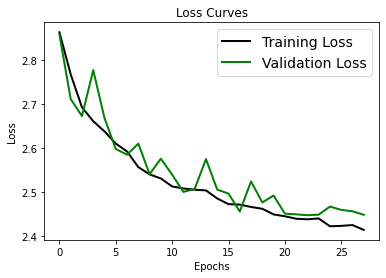

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

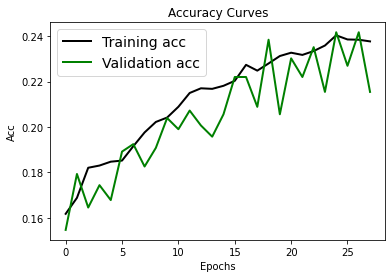

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth=2.0)
plt.legend(['Training acc', 'Validation acc'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Acc', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

Text(0.5, 1.0, 'AUC')

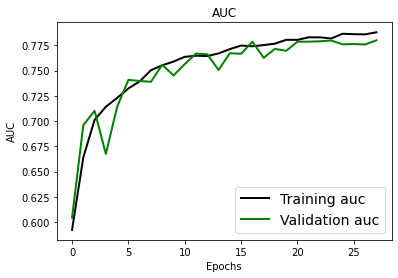

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['auc'], 'black', linewidth=2.0)
plt.plot(history.history['val_auc'], 'green', linewidth=2.0)
plt.legend(['Training auc', 'Validation auc'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('AUC', fontsize=10)
plt.title('AUC', fontsize=12)